# Sep ??st, 2021 (play xilin rois)

**Motivation**: fig 2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(344), load_preproc=True)
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


[PROGRESS] 'parcellation.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-344

[PROGRESS] 'parcellation_2d.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-344

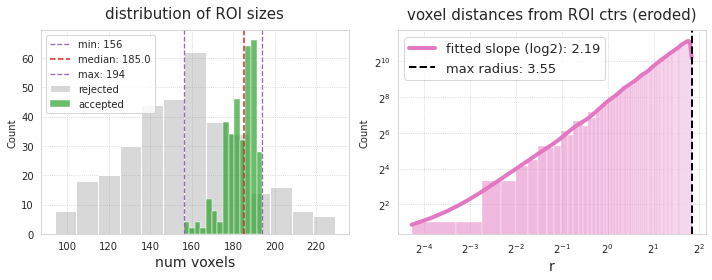

In [3]:
_ = mice.parcel.show()

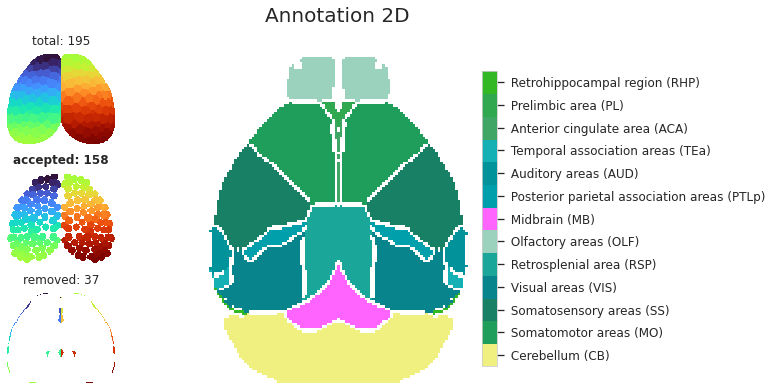

In [4]:
_ = mice.parcel.show2d()

In [5]:
_dir = pjoin(mice.cfg.base_dir, 'atlases_templates')
fine = pjoin(_dir, 'N162_finesc_symm_0.1.nii.gz')

In [7]:
import ants
img = ants.image_read(fine)

In [9]:
img

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (118, 90, 160)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

<matplotlib.image.AxesImage object at 0x7eac5445bf10>

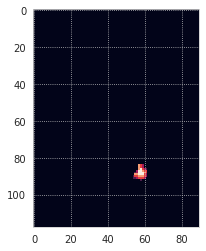

In [16]:
mask = img == 570
plt.imshow(mask.mean(2))

In [17]:
mask.sum()

148

In [23]:
import allensdk

In [24]:
allensdk.__version__

'2.11.2'

In [3]:
k = 6
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC')
group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

current expt: 'p20'

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k6

In [4]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

group_bins(0.2,1.0;4)_(2021_09_15).npy

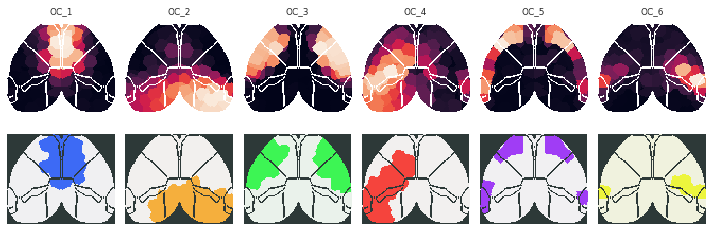

In [5]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(10, 3.6))

In [ ]:
_mask = allen['mcc'].get_structure_mask(s['id'])[0]

In [16]:
mice = Mice(Config(128))

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [17]:
mice.cfg.include_regions

[
    'LH',
    'PGRNl',
    'FN',
    'SCig',
    'ENTl',
    'BLAp',
    'PT',
    'CENT',
    'AON',
    'PGRNd',
    'sAMY',
    'PVR',
    'SPIV',
    'PVT',
    'ENTmv',
    'LA',
    'BLAa',
    'MA',
    'LGv',
    'NPC',
    'COAp',
    'TRS',
    'SGN',
    'AP',
    'COAa',
    'NDB',
    'PH',
    'IP',
    'VPL',
    'PVZ',
    'DEC',
    'SPVI',
    'IMD',
    'TM',
    'ACB',
    'LP',
    'AM',
    'VPLpc',
    'AN',
    'VPMpc',
    'RE',
    'CLA',
    'CA2',
    'DG-mo',
    'BLAv',
    'MS',
    'MY-mot',
    'PAA',
    'DP',
    'MBmot',
    'MY-sat',
    'DN',
    'P-sat',
    'TR',
    'PRM',
    'PO',
    'SCiw',
    'IAD',
    'RAmb',
    'PRE',
    'MBsta',
    'AOBgl',
    'FC',
    'NLOT1',
    'BMA',
    'UVU',
    'AOBgr',
    'DG-po',
    'ENTm',
    'PA',
    'SF',
    'DG-sg',
    'AV',
    'PMv',
    'GR',
    'MDRNd',
    'OT',
    'CU',
    'LGd',
    'MG',
    'CM',
    'AMBv',
    'POST',
    'GPe',
    'LM',
    'CP',
    'VM',
    'VPM',
    'VCO',
    'MH',
    'PAR',
    'MPN',
    'SUM',
    'LAV',
    'TT',
    'NTS',
    'LSc',
    'OP',
    'CUL',
    'SH',
    'PALc',
    'PVHd',
    'LSr',
    'NOT',
    'PSV',
    'PPT',
    'SUV',
    'POR',
    'VMH',
    'NLL',
    'EP',
    'SCsg',
    'PB',
    'MDRNv',
    'FL',
    'SCdw',
    'LING',
    'CA3',
    'SIM',
    'CL',
    'SCop',
    'PYR',
    'MOB',
    'RH',
    'SOCm',
    'CA1',
    'AMBd',
    'PRP',
    'AHN',
    'NOD',
    'GPi',
    'RT',
    'LZ',
    'IAM',
    'SPFm',
    'SPVO',
    'MD',
    'PR',
    'APN',
    'AOBmi',
    'MM',
    'ECU',
    'LD',
    'MV',
    'DCO',
    'SPFp',
    'NTB',
    'VAL',
    'FOTU',
    'SI',
    'SPA',
    'LSv',
    'MPT',
    'P-mot',
    'SMT',
    'POL',
    'AD',
    'NLOT3',
    'PMd',
    'MBsen',
    'PFL',
    'SCdg',
    'PF',
    'PIR',
    'SPVC',
    'PCN',
    'IGL',
    'COPY',
    'PP',
    'NR',
    'FS',
    'SUB',
    'SOCl'
]

In [26]:
structs = mice.allen[
    'structure_tree'].get_structures_by_acronym(mice.cfg.include_regions)
for s in structs:
    try:
        _mask = mice.allen['mcc'].get_structure_mask(s['id'])[0]
    except Exception:
        print(s)

2021-09-20 21:14:34,570 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_934.nrrd
2021-09-20 21:14:34,711 allensdk.api.api.retrieve_file_over_http ERROR    Couldn't retrieve file /home/hadi/Documents/workspaces/allen/MouseConnectivity/annotation/ccf_2017/structure_masks/resolution_100/structure_934.nrrd from http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_masks/structure_masks_100/structure_934.nrrd (request).
2021-09-20 21:14:34,712 allensdk.api.api.retrieve_file_over_http ERROR    We weren't able to download a structure mask for structure {0}. 
                                             You can instead build the mask locally using 
                                             ReferenceSpace.many_structure_masks


{
    'acronym': 'ENTmv',
    'graph_id': 1,
    'graph_order': 517,
    'id': 934,
    'name': 'Entorhinal area, medial part, ventral zone',
    'structure_id_path': [997, 8, 567, 688, 695, 1089, 822, 909, 934],
    'structure_set_ids': [687527945, 184527634, 12],
    'rgb_triplet': [50, 184, 37]
}

In [28]:
934 in mice.allen['annot']

False

In [31]:
567 in mice.allen['annot']

False

In [34]:
mice.allen['structure_tree'].get_structures_by_acronym(['MOs'])

[
    {
        'acronym': 'MOs',
        'graph_id': 1,
        'graph_order': 24,
        'id': 993,
        'name': 'Secondary motor area',
        'structure_id_path': [997, 8, 567, 688, 695, 315, 500, 993],
        'structure_set_ids': [
            112905828,
            688152357,
            691663206,
            687527945,
            12,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [31, 157, 90]
    }
]

In [35]:
993 in mice.allen['annot']

False

In [36]:
np.unique(mice.allen['annot'])

array([        0,         1,         2,         6,         7,         9,
              10,        12,        15,        17,        19,        20,
              23,        26,        27,        28,        30,        33,
              35,        36,        38,        41,        42,        50,
              52,        54,        56,        58,        59,        62,
              63,        64,        66,        67,        68,        72,
              74,        75,        78,        81,        83,        84,
              88,        91,        93,        96,        97,        98,
             100,       101,       102,       105,       106,       108,
             113,       114,       115,       117,       118,       120,
             121,       122,       123,       125,       126,       128,
             129,       131,       132,       133,       136,       139,
             140,       143,       145,       146,       147,       148,
             149,       153,       155,       156,       158,       159,
             162,       163,       169,       171,       173,       177,
             178,       180,       181,       186,       187,       188,
             189,       190,       194,       196,       197,       198,
             201,       202,       203,       204,       206,       207,
             209,       210,       211,       214,       215,       217,
             218,       222,       223,       225,       226,       229,
             230,       231,       233,       234,       237,       238,
             243,       246,       249,       250,       251,       252,
             255,       257,       258,       260,       262,       263,
             266,       268,       269,       271,       272,       274,
             279,       280,       281,       286,       287,       288,
             289,       292,       296,       298,       301,       303,
             304,       305,       307,       310,       311,       313,
             314,       318,       320,       321,       325,       326,
             327,       328,       330,       332,       333,       334,
             335,       336,       338,       342,       344,       347,
             349,       350,       351,       354,       355,       356,
             358,       362,       363,       364,       366,       368,
             372,       374,       377,       380,       381,       382,
             390,       393,       397,       401,       403,       412,
             413,       414,       421,       422,       423,       427,
             428,       429,       430,       433,       434,       436,
             437,       440,       441,       442,       443,       445,
             448,       449,       450,       451,       452,       456,
             460,       461,       463,       466,       469,       470,
             477,       478,       482,       483,       484,       488,
             501,       502,       506,       507,       510,       512,
             515,       520,       523,       525,       526,       527,
             530,       531,       534,       538,       540,       542,
             543,       544,       549,       551,       553,       556,
             558,       559,       564,       565,       566,       573,
             574,       575,       576,       577,       579,       580,
             581,       582,       583,       587,       588,       590,
             591,       593,       595,       596,       597,       598,
             599,       600,       601,       603,       604,       605,
             608,       609,       610,       611,       612,       613,
             614,       616,       620,       621,       622,       625,
             628,       629,       630,       632,       633,       634,
             638,       639,       642,       643,       648,       649,
             651,       653,       654,       655,       656,       657,
             658,       661,       662,       663,       6

In [5]:
include = mice.cfg.include_regions

print(len(include))

if 'Isocortex' not in include:
    include += ['Isocortex']
    
print(len(include))

173

174

In [6]:
include

[
    'CUL',
    'NLOT3',
    'MH',
    'NPC',
    'NLOT1',
    'IP',
    'SPVI',
    'MPN',
    'MPT',
    'MM',
    'UVU',
    'VM',
    'BMA',
    'AOBgr',
    'PH',
    'MBsen',
    'CM',
    'LA',
    'CA1',
    'AV',
    'AHN',
    'PMd',
    'SPVC',
    'NOD',
    'VCO',
    'PGRNl',
    'PAR',
    'SCiw',
    'PRM',
    'LP',
    'APN',
    'CA3',
    'CP',
    'VPMpc',
    'BLAa',
    'PP',
    'CLA',
    'PVR',
    'MS',
    'sAMY',
    'BLAp',
    'PGRNd',
    'SH',
    'VAL',
    'DP',
    'POST',
    'P-mot',
    'IAM',
    'VPL',
    'SGN',
    'SUM',
    'PAA',
    'DG-po',
    'ENTmv',
    'SOCm',
    'LM',
    'SPVO',
    'MBmot',
    'COAa',
    'PCN',
    'PVHd',
    'MY-sat',
    'MD',
    'SMT',
    'LD',
    'NDB',
    'SF',
    'FOTU',
    'MA',
    'AMBv',
    'LAV',
    'MOB',
    'SI',
    'SCsg',
    'CU',
    'LING',
    'DEC',
    'TT',
    'PA',
    'BLAv',
    'FN',
    'NTS',
    'PMv',
    'LGd',
    'CL',
    'SPA',
    'COPY',
    'ENTl',
    'FL',
    'EP',
    'PRP',
    'AOBgl',
    'DCO',
    'TR',
    'OP',
    'AP',
    'NTB',
    'AN',
    'PALc',
    'MG',
    'PT',
    'FC',
    'MBsta',
    'PYR',
    'SOCl',
    'SUV',
    'VPLpc',
    'TM',
    'COAp',
    'POL',
    'OT',
    'PSV',
    'VMH',
    'GPi',
    'PR',
    'LH',
    'NLL',
    'MY-mot',
    'NOT',
    'MDRNv',
    'AM',
    'SUB',
    'ENTm',
    'MDRNd',
    'ACB',
    'PFL',
    'LGv',
    'FS',
    'AON',
    'P-sat',
    'RAmb',
    'SIM',
    'PPT',
    'DG-sg',
    'PF',
    'NR',
    'SPIV',
    'VPM',
    'LZ',
    'ECU',
    'SCig',
    'AOBmi',
    'PB',
    'GR',
    'IMD',
    'AD',
    'GPe',
    'SPFm',
    'SCdw',
    'DG-mo',
    'LSv',
    'IAD',
    'RT',
    'PVZ',
    'CA2',
    'TRS',
    'PVT',
    'AMBd',
    'SPFp',
    'PRE',
    'RE',
    'SCop',
    'CENT',
    'LSc',
    'RH',
    'MV',
    'PO',
    'IGL',
    'DN',
    'POR',
    'PIR',
    'LSr',
    'SCdg',
    'Isocortex'
]

In [7]:
structs = mice.allen['structure_tree'].get_structures_by_acronym(include)

In [9]:
[f"{e['acronym']} ({e['name']})" for e in structs]

[
    'CUL (Culmen)',
    'NLOT3 (Nucleus of the lateral olfactory tract, layer 3)',
    'MH (Medial habenula)',
    'NPC (Nucleus of the posterior commissure)',
    'NLOT1 (Nucleus of the lateral olfactory tract, molecular layer)',
    'IP (Interposed nucleus)',
    'SPVI (Spinal nucleus of the trigeminal, interpolar part)',
    'MPN (Medial preoptic nucleus)',
    'MPT (Medial pretectal area)',
    'MM (Medial mammillary nucleus)',
    'UVU (Uvula (IX))',
    'VM (Ventral medial nucleus of the thalamus)',
    'BMA (Basomedial amygdalar nucleus)',
    'AOBgr (Accessory olfactory bulb, granular layer)',
    'PH (Posterior hypothalamic nucleus)',
    'MBsen (Midbrain, sensory related)',
    'CM (Central medial nucleus of the thalamus)',
    'LA (Lateral amygdalar nucleus)',
    'CA1 (Field CA1)',
    'AV (Anteroventral nucleus of thalamus)',
    'AHN (Anterior hypothalamic nucleus)',
    'PMd (Dorsal premammillary nucleus)',
    'SPVC (Spinal nucleus of the trigeminal, caudal part)',
    'NOD (Nodulus (X))',
    'VCO (Ventral cochlear nucleus)',
    'PGRNl (Paragigantocellular reticular nucleus, lateral part)',
    'PAR (Parasubiculum)',
    'SCiw (Superior colliculus, motor related, intermediate white layer)',
    'PRM (Paramedian lobule)',
    'LP (Lateral posterior nucleus of the thalamus)',
    'APN (Anterior pretectal nucleus)',
    'CA3 (Field CA3)',
    'CP (Caudoputamen)',
    'VPMpc (Ventral posteromedial nucleus of the thalamus, parvicellular part)',
    'BLAa (Basolateral amygdalar nucleus, anterior part)',
    'PP (Peripeduncular nucleus)',
    'CLA (Claustrum)',
    'PVR (Periventricular region)',
    'MS (Medial septal nucleus)',
    'sAMY (Striatum-like amygdalar nuclei)',
    'BLAp (Basolateral amygdalar nucleus, posterior part)',
    'PGRNd (Paragigantocellular reticular nucleus, dorsal part)',
    'SH (Septohippocampal nucleus)',
    'VAL (Ventral anterior-lateral complex of the thalamus)',
    'DP (Dorsal peduncular area)',
    'POST (Postsubiculum)',
    'P-mot (Pons, motor related)',
    'IAM (Interanteromedial nucleus of the thalamus)',
    'VPL (Ventral posterolateral nucleus of the thalamus)',
    'SGN (Suprageniculate nucleus)',
    'SUM (Supramammillary nucleus)',
    'PAA (Piriform-amygdalar area)',
    'DG-po (Dentate gyrus, polymorph layer)',
    'ENTmv (Entorhinal area, medial part, ventral zone)',
    'SOCm (Superior olivary complex, medial part)',
    'LM (Lateral mammillary nucleus)',
    'SPVO (Spinal nucleus of the trigeminal, oral part)',
    'MBmot (Midbrain, motor related)',
    'COAa (Cortical amygdalar area, anterior part)',
    'PCN (Paracentral nucleus)',
    'PVHd (Paraventricular hypothalamic nucleus, descending division)',
    'MY-sat (Medulla, behavioral state related)',
    'MD (Mediodorsal nucleus of thalamus)',
    'SMT (Submedial nucleus of the thalamus)',
    'LD (Lateral dorsal nucleus of thalamus)',
    'NDB (Diagonal band nucleus)',
    'SF (Septofimbrial nucleus)',
    'FOTU (Folium-tuber vermis (VII))',
    'MA (Magnocellular nucleus)',
    'AMBv (Nucleus ambiguus, ventral division)',
    'LAV (Lateral vestibular nucleus)',
    'MOB (Main olfactory bulb)',
    'SI (Substantia innominata)',
    'SCsg (Superior colliculus, superficial gray layer)',
    'CU (Cuneate nucleus)',
    'LING (Lingula (I))',
    'DEC (Declive (VI))',
    'TT (Taenia tecta)',
    'PA (Posterior amygdalar nucleus)',
    'BLAv (Basolateral amygdalar nucleus, ventral part)',
    'FN (Fastigial nucleus)',
    'NTS (Nucleus of the solitary tract)',
    'PMv (Ventral premammillary nucleus)',
    'LGd (Dorsal part of the lateral geniculate complex)',
    'CL (Central lateral nucleus of the thalamus)',
    'SPA (Subparafascicular area)',
    'COPY (Copula pyramidis)',
    'ENTl (Entorhinal area, lateral part)',
    'FL (Flocculus)',
    'EP (Endopiriform nucleus)',
    'PRP (Nucleus prepositus)',
    'AOBgl (Accessory olfactory bulb, glomerular layer)',
    'DCO (Dorsal cochlear nucleus)',
    'TR (Postpiri

In [6]:
from register.atlas import get_subtree, included_intersect_tables
tree = load_bg_atlas().hierarchy

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [7]:
_ = get_subtree(
    tree,
    base_id=8,
    n_levels=3,
    show=True,
)

grey (8)
├── BS (343)
│   ├── HB (1065)
│   ├── IB (1129)
│   └── MB (313)
├── CB (512)
│   ├── CBN (519)
│   └── CBX (528)
└── CH (567)
    ├── CNU (623)
    └── CTX (688)



In [6]:
_ = get_subtree(
    tree,
    base_id=567,
    n_levels=4,
    show=True,
)

CH (567)
├── CNU (623)
│   ├── PAL (803)
│   │   ├── PALc (809)
│   │   ├── PALd (818)
│   │   ├── PALm (826)
│   │   └── PALv (835)
│   └── STR (477)
│       ├── LSX (275)
│       ├── STRd (485)
│       ├── STRv (493)
│       └── sAMY (278)
└── CTX (688)
    ├── CTXpl (695)
    │   ├── HPF (1089)
    │   ├── Isocortex (315)
    │   └── OLF (698)
    └── CTXsp (703)
        ├── BLA (295)
        ├── BMA (319)
        ├── CLA (583)
        ├── EP (942)
        ├── LA (131)
        └── PA (780)



In [17]:
cortex_subtree, base_lvl = get_subtree(
    tree,
    base_id=315,
    n_levels=2,
    show=True,
)

Isocortex (315)
├── ACA (31)
├── AI (95)
├── AUD (247)
├── ECT (895)
├── FRP (184)
├── GU (1057)
├── ILA (44)
├── MO (500)
├── ORB (714)
├── PERI (922)
├── PL (972)
├── PTLp (22)
├── RSP (254)
├── SS (453)
├── TEa (541)
├── VIS (669)
└── VISC (677)



In [18]:
os.listdir(mice.cfg.base_dir)

[
    'processed',
    '_label_names.rtf',
    'Symmetric_N162_0.275.nii.gz',
    'allcell_xilin_grand28_flip_symm.nii.gz',
    'overlay0.nii.gz',
    'N162_medium_symm_0.1.nii.gz',
    'Symmetric_N162_0.10.nii.gz',
    'Symmetric_N162_0.20.nii.gz',
    'N162_finesc_symm_0.1.nii.gz',
    'mouseatlas_2020.json',
    'test2.nii.gz',
    'N162_medium_symm_0.2.nii.gz',
    'N162_finesc_symm_0.2.nii.gz',
    'Symmetric_N162_0.05.nii.gz',
    'test.nii.gz',
    'Inverse_Atlas2014_LPS_sm_Symmetric_N162_0.20.grd',
    'Inverse_Atlas2014_LPS_sm_Symmetric_N162_0.10.grd',
    'N162_coarse_symm_0.2.nii.gz',
    'atlases_templates'
]

In [19]:
import json

file = pjoin(mice.cfg.base_dir, 'mouseatlas_2020.json')
with open(file, 'r') as f:
    atlas = json.load(f)

In [20]:
atlas['labels']['data'][2]['name']

'Detailed-224'

In [21]:
fine_labels = atlas['labels']['data'][2]['labels']
fine_labels

{
    '1': 'R-Frontal pole, cerebral cortex (FRP,184)',
    '2': 'R-Primary motor area (MOp,985)',
    '3': 'R-Secondary motor area (MOs,993)',
    '4': 'R-Primary somatosensory area, nose (SSp-n,353)',
    '5': 'R-Primary somatosensory area, barrel field (SSp-bfd,329)',
    '6': 'R-Primary somatosensory area, lower limb (SSp-ll,337)',
    '7': 'R-Primary somatosensory area, mouth (SSp-m,345)',
    '8': 'R-Primary somatosensory area, upper limb (SSp-ul,369)',
    '9': 'R-Primary somatosensory area, trunk (SSp-tr,361)',
    '10': 'R-Primary somatosensory area, unassigned (SSp-un,182305689)',
    '11': 'R-Supplemental somatosensory area (SSs,378)',
    '12': 'R-Gustatory areas (GU,1057)',
    '13': 'R-Visceral area (VISC,677)',
    '14': 'R-Dorsal auditory area (AUDd,1011)',
    '15': 'R-Primary auditory area (AUDp,1002)',
    '16': 'R-Posterior auditory area (AUDpo,1027)',
    '17': 'R-Ventral auditory area (AUDv,1018)',
    '18': 'R-Anterolateral visual area (VISal,402)',
    '19': 'R-Anteromedial visual area (VISam,394)',
    '20': 'R-Lateral visual area (VISl,409)',
    '21': 'R-Primary visual area (VISp,385)',
    '22': 'R-Posterolateral visual area (VISpl,425)',
    '23': 'R-posteromedial visual area (VISpm,533)',
    '24': 'R-Anterior area (VISa,312782546)',
    '25': 'R-Laterointermediate area (VISli,312782574)',
    '26': 'R-Rostrolateral visual area (VISrl,417)',
    '27': 'R-Postrhinal area (VISpor,312782628)',
    '28': 'R-Anterior cingulate area, dorsal part (ACAd,39)',
    '29': 'R-Anterior cingulate area, ventral part (ACAv,48)',
    '30': 'R-Prelimbic area (PL,972)',
    '31': 'R-Infralimbic area (ILA,44)',
    '32': 'R-Orbital area, lateral part (ORBl,723)',
    '33': 'R-Orbital area, medial part (ORBm,731)',
    '34': 'R-Orbital area, ventrolateral part (ORBvl,746)',
    '35': 'R-Agranular insular area, dorsal part (AId,104)',
    '36': 'R-Agranular insular area, posterior part (AIp,111)',
    '37': 'R-Agranular insular area, ventral part (AIv,119)',
    '38': 'R-Retrosplenial area, lateral agranular part (RSPagl,894)',
    '39': 'R-Retrosplenial area, dorsal part (RSPd,879)',
    '40': 'R-Retrosplenial area, ventral part (RSPv,886)',
    '41': 'R-Temporal association areas (TEa,541)',
    '42': 'R-Perirhinal area (PERI,922)',
    '43': 'R-Ectorhinal area (ECT,895)',
    '44': 'R-Main olfactory bulb (MOB,507)',
    '45': 'R-Accessory olfactory bulb, glomerular layer (AOBgl,188)',
    '46': 'R-Accessory olfactory bulb, granular layer (AOBgr,196)',
    '47': 'R-Accessory olfactory bulb, mitral layer (AOBmi,204)',
    '48': 'R-Nucleus of the lateral olfactory tract, layer 3 (NLOT3,1139)',
    '49': 'R-Anterior olfactory nucleus (AON,159)',
    '50': 'R-Nucleus of the lateral olfactory tract, molecular layer (NLOT1,260)',
    '51': 'R-Postpiriform transition area (TR,566)',
    '52': 'R-Taenia tecta (TT,589)',
    '53': 'R-Cortical amygdalar area, anterior part (COAa,639)',
    '54': 'R-Cortical amygdalar area, posterior part (COAp,647)',
    '55': 'R-Piriform-amygdalar area (PAA,788)',
    '56': 'R-Dorsal peduncular area (DP,814)',
    '57': 'R-Piriform area (PIR,961)',
    '58': 'R-Main olfactory bulb (MOB,507)',
    '59': 'R-Field CA1 (CA1,382)',
    '60': 'R-Field CA2 (CA2,423)',
    '61': 'R-Field CA3 (CA3,463)',
    '62': 'R-Dentate gyrus, molecular layer (DG-mo,10703)',
    '63': 'R-Dentate gyrus, polymorph layer (DG-po,10704)',
    '64': 'R-Dentate gyrus, granule cell layer (DG-sg,632)',
    '65': 'R-Fasciola cinerea (FC,982)',
    '66': 'R-Subiculum (SUB,502)',
    '67': 'R-Parasubiculum (PAR,843)',
    '68': 'R-Entorhinal area, lateral part (ENTl,918)',
    '69': 'R-Entorhinal area, medial part, dorsal zone (ENTm,926)',
    '70': 'R-Entorhinal area, medial part, ventral zone (ENTmv,934)',
    '71': 'R-Postsubiculum (POST,1037)',
    '72': 'R-Presubiculum (PRE,1084)',
    '73': 'R-Claustrum (CLA,583)',
    '74': 'R-Endopiriform nucleus (EP,942)',
    '75': 'R-Lateral amygdalar nucleus (LA,131)',
    '76': 

In [22]:
fine_acros = [s.split('(')[-1].split(',')[0] for s in fine_labels.values()]
fine_acros = list(set(fine_acros))
fine_structs = mice.allen['structure_tree'].get_structures_by_acronym(fine_acros)
fine_subcortical = [
    s['acronym'] for s in fine_structs
    if s['id'] not in cortex_subtree
]
len(fine_subcortical)

173

In [26]:
tables = included_intersect_tables(
    s_included=fine_subcortical,
    s_main=['BS', 'CB', 'CNU', 'HPF', 'OLF', 'CTXsp'],
    export_path='/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine',
    allen=mice.allen,
    tree=tree,
)

[PROGRESS] 'hierarchy_root-BS.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

[PROGRESS] 'hierarchy_root-CB.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

[PROGRESS] 'hierarchy_root-CNU.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

[PROGRESS] 'hierarchy_root-HPF.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

[PROGRESS] 'hierarchy_root-OLF.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

[PROGRESS] 'hierarchy_root-CTXsp.html' saved at
/home/hadi/Dropbox/Proj-Overlap-Figs/ROI_subcortical/xilin_fine

In [27]:
from bg_atlasapi import show_atlases
show_atlases()

                                                                                  
                                                                                  
                                Brainglobe Atlases                                
╭──────────────────────────────────┬────────────┬───────────────┬────────────────╮
│ Name                             │ Downloaded │ Local version │ Latest version │
├──────────────────────────────────┼────────────┼───────────────┼────────────────┤
│ allen_cord_20um                  │     ✔      │      1.0      │      1.0       │
│ mpin_zfish_1um                   │     ✔      │      1.0      │      1.0       │
│ example_mouse_100um              │     ✔      │      1.2      │      1.2       │
│ kim_mouse_100um                  │     ✔      │      1.0      │      1.0       │
│ osten_mouse_100um                │     ✔      │      1.1      │      1.1       │
│ allen_mouse_100um                │     ✔      │      1.2      │      1.2       │
│ allen_mouse_10um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_25um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_50um                 │    ---     │      ---      │      1.2       │
│ allen_human_500um                │    ---     │      ---      │      0.1       │
│ kim_mouse_10um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_25um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_50um                   │    ---     │      ---      │      1.0       │
│ osten_mouse_10um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_25um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_50um                 │    ---     │      ---      │      1.1       │
╰──────────────────────────────────┴────────────┴───────────────┴────────────────╯

In [50]:
from bg_atlasapi.bg_atlas import BrainGlobeAtlas
bg_atlas = BrainGlobeAtlas("kim_mouse_100um")

kim mouse atlas (res. 100um)
From: https://kimlab.io/brain-map/atlas/ (Chon et al. 2019, https://doi.org/10.1038/s41467-019-13057-w )


<matplotlib.image.AxesImage object at 0x7ffa9e690d90>

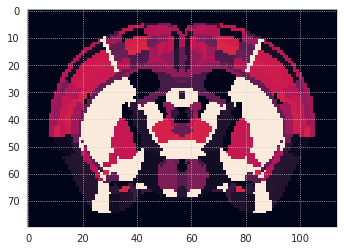

In [70]:
plt.imshow(bg_atlas.annotation[60], vmin=100, vmax=2000)

In [92]:
_ = get_subtree(
    tree = bg_atlas.hierarchy,
    base_id=485,
    n_levels=9,
    show=True,
)

STRd (485)
└── CP (672)
    ├── CPc (2496)
    │   ├── CPc, d (2493)
    │   │   ├── CPc, d, dl (2485)
    │   │   ├── CPc, d, dm (2484)
    │   │   └── CPc, d, vm (2486)
    │   ├── CPc, i (2494)
    │   │   ├── CPc, i, d (2487)
    │   │   ├── CPc, i, vl (2488)
    │   │   └── CPc, i, vm (2489)
    │   └── CPc, v (2490)
    ├── CPce (2495)
    ├── CPi (2492)
    │   ├── CPi, dl (2499)
    │   │   ├── CPi, dl, d (2300)
    │   │   └── CPi, dl, imd (2301)
    │   ├── CPi, dm (2498)
    │   │   ├── CPi, dm, cd (2374)
    │   │   ├── CPi, dm, dl (2299)
    │   │   ├── CPi, dm, dt (2380)
    │   │   └── CPi, dm, im (2298)
    │   ├── CPi, vl (2501)
    │   │   ├── CPi, vl, cvl (2370)
    │   │   ├── CPi, vl, imv (2479)
    │   │   ├── CPi, vl, v (2482)
    │   │   └── CPi, vl, vt (2481)
    │   └── CPi, vm (2500)
    │       ├── CPi, vm, cvm (2483)
    │       ├── CPi, vm, v (2480)
    │       └── CPi, vm, vm (2302)
    ├── CPr (2491)
    │   ├── CPr, imd (2295)
    │   ├── CPr, imv (2296

In [99]:
bg_atlas.structures[2374]

{
    'name': 'Caudoputamen- intermediate, dorsomedial, central dorsal',
    'acronym': 'CPi, dm, cd',
    'id': 2374,
    'structure_id_path': [997, 8, 567, 623, 477, 485, 672, 2492, 2498, 2374],
    'rgb_triplet': [255, 255, 255],
    'mesh_filename': PosixPath('/home/hadi/.brainglobe/kim_mouse_100um_v1.0/meshes/2374.obj'),
    'mesh': <meshio mesh object>
  Number of points: 4296
  Number of cells:
    triangle: 4300
}

In [98]:
bg_atlas.get_structure_descendants(485)

[
    'CP',
    'CPre',
    'CPr',
    'CPr, m',
    'CPr, imd',
    'CPr, imv',
    'CPr, l',
    'CPr, l, ls',
    'CPr, l, vm',
    'CPi',
    'CPi, dm',
    'CPi, dm, dl',
    'CPi, dm, im',
    'CPi, dm, cd',
    'CPi, dm, dt',
    'CPi, vm',
    'CPi, vm, vm',
    'CPi, vm, v',
    'CPi, vm, cvm',
    'CPi, dl',
    'CPi, dl, d',
    'CPi, dl, imd',
    'CPi, vl',
    'CPi, vl, imv',
    'CPi, vl, v',
    'CPi, vl, vt',
    'CPi, vl, cvl',
    'CPc',
    'CPc, d',
    'CPc, d, dm',
    'CPc, d, dl',
    'CPc, d, vm',
    'CPc, i',
    'CPc, i, d',
    'CPc, i, vm',
    'CPc, i, vl',
    'CPc, v',
    'CPce'
]

In [19]:
t = tables['BS']

In [20]:
html = t.get_html_string(
    header=True,
    border=True,
    format=True,
)

In [21]:
html

'<table frame="box" rules="cols">\n    <thead>\n        <tr>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">lvl</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">id</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">acronym (name)</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">parent</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center"># vox</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">sz / cortex</th>\n        </tr>\n    </thead>\n    <tbody>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">343</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">BS (Brain stem)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">BS (Basic c...)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">119632</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">97 %</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">3</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1065</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">HB (Hindbrain)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">HB (Brain stem)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">47624</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">39 %</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">3</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1129</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">IB (Interbrain)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: 

In [58]:
mice.cfg.include_regions

[
    'PALd',
    'PALv',
    'PALm',
    'PALc',
    'STRd',
    'STRv',
    'LSX',
    'sAMY',
    'MOB',
    'AOB',
    'AON',
    'TT',
    'DP',
    'PIR',
    'NLOT',
    'COA',
    'PAA',
    'TR',
    'CA',
    'DG',
    'ENTl',
    'ENTm',
    'PAR',
    'POST',
    'PRE',
    'SUB',
    'ProS',
    'HATA',
    'APr',
    'MY-sen',
    'MY-mot',
    'P-sen',
    'P-mot',
    'P-sat',
    'HY',
    'DORsm',
    'DORpm',
    'MBsen',
    'MBmot',
    'MBsta',
    'CBN',
    'VERM',
    'SIM',
    'AN',
    'PRM',
    'COPY',
    'PFL',
    'FL',
    'CTXsp',
    'Isocortex'
]

In [61]:
set(mid_subcortical).symmetric_difference(set(mice.cfg.include_regions))

{
    'SUB',
    'DG',
    'APr',
    'COPY',
    'BLA',
    'EP',
    'CTXsp',
    'FL',
    'PFL',
    'SIM',
    'CLA',
    'VERM',
    'LZ',
    'PRM',
    'HATA',
    'POST',
    'CA',
    'MEZ',
    'Isocortex',
    'HIP',
    'PVZ',
    'AN',
    'PVR',
    'ENTm',
    'RHP',
    'PAR',
    'PRE',
    'CBX',
    'HY',
    'PA',
    'BMA',
    'ENTl',
    'LA',
    'MY-sat',
    'ProS'
}

In [62]:
len(set(mid_subcortical).intersection(set(mice.cfg.include_regions)))

29

In [ ]:
len(set(mid_subcortical).intersection(set(mice.cfg.include_regions)))

In [60]:
mid_subcortical

[
    'STRv',
    'BLA',
    'EP',
    'P-sen',
    'PIR',
    'PALv',
    'LSX',
    'MY-sen',
    'TR',
    'MBsta',
    'CLA',
    'P-sat',
    'DP',
    'MY-mot',
    'DORpm',
    'NLOT',
    'LZ',
    'MEZ',
    'MBmot',
    'CBN',
    'HIP',
    'AOB',
    'AON',
    'PVZ',
    'PALm',
    'DORsm',
    'TT',
    'MOB',
    'PVR',
    'RHP',
    'PAA',
    'sAMY',
    'MBsen',
    'CBX',
    'PA',
    'P-mot',
    'PALc',
    'BMA',
    'STRd',
    'LA',
    'PALd',
    'MY-sat',
    'COA'
]

{
    'ILA',
    'FRP',
    'BLA',
    'EP',
    'PTLp',
    'SS',
    'CLA',
    'RSP',
    'GU',
    'ECT',
    'VIS',
    'PL',
    'LZ',
    'MO',
    'TEa',
    'MEZ',
    'HIP',
    'VISC',
    'PVZ',
    'AI',
    'PVR',
    'RHP',
    'CBX',
    'AUD',
    'PERI',
    'ORB',
    'PA',
    'BMA',
    'LA',
    'MY-sat',
    'ACA'
}

In [17]:
img = nib.load(pjoin(_dir, 'N162_medium_symm_0.2.nii.gz'))
arr = img.get_fdata()
arr.shape, arr.dtype

((60, 46, 81), dtype('float64'))

In [18]:
np.unique(arr)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
       117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138.,
       139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160.])

In [15]:
mice.allen['template_info']['sizes']

array([132,  80, 114])

In [16]:
[a / b for a, b in zip(mice.allen['template_info']['sizes'], arr.shape)]

[2.2, 1.7391304347826086, 1.4074074074074074]